## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.

### Instructions

* **Download this notebook** as you would any other ipynb file
* **Upload** to Google Colab or work locally (if you have that set-up)
* **Delete `raise NotImplementedError()`**
* Write your code in the `# YOUR CODE HERE` space
* **Execute** the Test cells that contain `assert` statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)
* **Save** your notebook when you are finished
* **Download** as a `ipynb` file (if working in Colab)
* **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)

# Lambda School Data Science - Unit 1 Sprint 3

## Sprint Challenge - Linear Algebra

### Total notebook points: 10


## Welcome to the final Sprint Challenge of Unit 1!

In this challenge, we're going to explore two different datasets where you can demonstrate your skills with fitting linear regression models and practicing some of the linear algebra concepts you learned.

**Make sure to follow the instructions in each task carefully!** The autograded tests are very specific in that they are designed to test on the exact instructions.

Good luck!


## Part A: Linear Regression

### Use the following information to complete Tasks 1 - 11

### Dataset description

The data you will work on for this Sprint Challenge is from the World Happiness Report. The report compiles data from a survey of hundreds of countries and looks at factors such as economic production, social support, life expectancy, freedom, absence of corruption, and generosity to determine a happiness "score". 

In this Sprint Challenge, we're only going to look at the report for years 2018 and 2019. We're going to see how much the happiness "score" depends on some of the factors listed above.

For more information about the data, you can look here: [Kaggle: World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness)

### Task 1 - Load the data

* import both `pandas` and `numpy`
* use the URL provided to read in your DataFrame
* load the CSV file as a DataFrame with the name `happy` and **set the index column as** `Overall_rank`.
* the shape of your DataFrame should be `(312, 8)`

In [ ]:
# Task 1
import pandas as pd
import numpy as np
# URL provided
url = "https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Happy/happiness_years18_19.csv"

# YOUR CODE HERE
happy = pd.read_csv(url,index_col='Overall_rank')

# Print out the DataFrame
happy.head()

,Country_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption
Overall_rank,,,,,,,,
1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,NaN
3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,NaN
4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


**Task 1 - Test**

In [ ]:
# Task 1 - Test

assert isinstance(happy, pd.DataFrame), 'Have you created a DataFrame named `happy`?'
assert happy.index.name == 'Overall_rank', "Your index should be 'Overall_rank'."
assert len(happy) == 312


**Task 2** - Explore the data and find NaNs

Now you want to take a look at the dataset, determine the variable types of the columns, identify missing values, and generally better understand your data.

**Your tasks**

* Use describe() and info() to learn about any missing values, the data types, and descriptive statistics for each numeric value
* Sum the null values and assign that number to the variable `num_null`; the variable type should be a `numpy.int64` integer.

**Hint:** If you use `np.isnull()` it will return the number of null values in each column. You want the total number of null values in the entire DataFrame; one way to do this is to apply the `.sum()` method twice: `.sum().sum()`

In [ ]:
# Task 2

# YOUR CODE HERE
num_null = happy.isnull().sum().sum()

# Print out your integer result
print("The total number of null values is:", num_null)

The total number of null values is: 226


**Task 2 Test**

In [ ]:
# Task 2 - Test
import numpy as np
assert isinstance(num_null, np.int64), 'The sum of the NaN values should be an integer.'


**Task 3** - Drop a column

As you noticed in the previous task, the column `Perceptions_corruption` has a lot of missing values. Let's determine how many are missing and then drop the column. Note: dropping a column isn't always the best choice when faced with missing values but we're choosing that option here, partly for practice.

* Calculate the percentage of NaN values in `Perceptions_corruption` and assign the result to the variable `corruption_nan`; the value should be a **float** between `1.0` and `100.0`.
* Drop the `Perceptions_corruption` column from `happy` but keep the DataFrame name the same; use the parameter `inplace=True`. You will also want to specify the axis on which to operate.

In [ ]:
# Task 3

# YOUR CODE HERE
corruption_nan = round(num_null/len(happy)*100,1)
happy = happy.drop('Perceptions_corruption', axis=1)
# Print the percentage of NaN values
print(corruption_nan)

# Print happy to verify the column was dropped
happy.head()

72.4


,Country_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_life_choices,Generosity
Overall_rank,,,,,,,
1,Finland,7.632,1.305,1.592,0.874,0.681,0.202
2,Norway,7.594,1.456,1.582,0.861,0.686,0.286
3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284
4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353
5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256


***Task 3 Test**

In [ ]:
# Task 3 - Test

assert isinstance(corruption_nan, np.float), 'The percentage of NaN values should be a float.'
assert corruption_nan >= 1, 'Make sure you calculated the percentage and not the decimal fraction.'


**Task 4** - Visualize the dataset

Next, we'll create a visualization for this dataset. We know from the introduction that we're trying to predict the happiness score from the other factors. Before we do let, let's visualize the dataset using a seaborn `pairplot` to look at all of the columns plotted as "pairs".

**Your tasks**

* Use the seaborn library `sns.pairplot()` function to create your visualization (use the starter code provided)

This task will not be autograded - but it is part of completing the challenge.

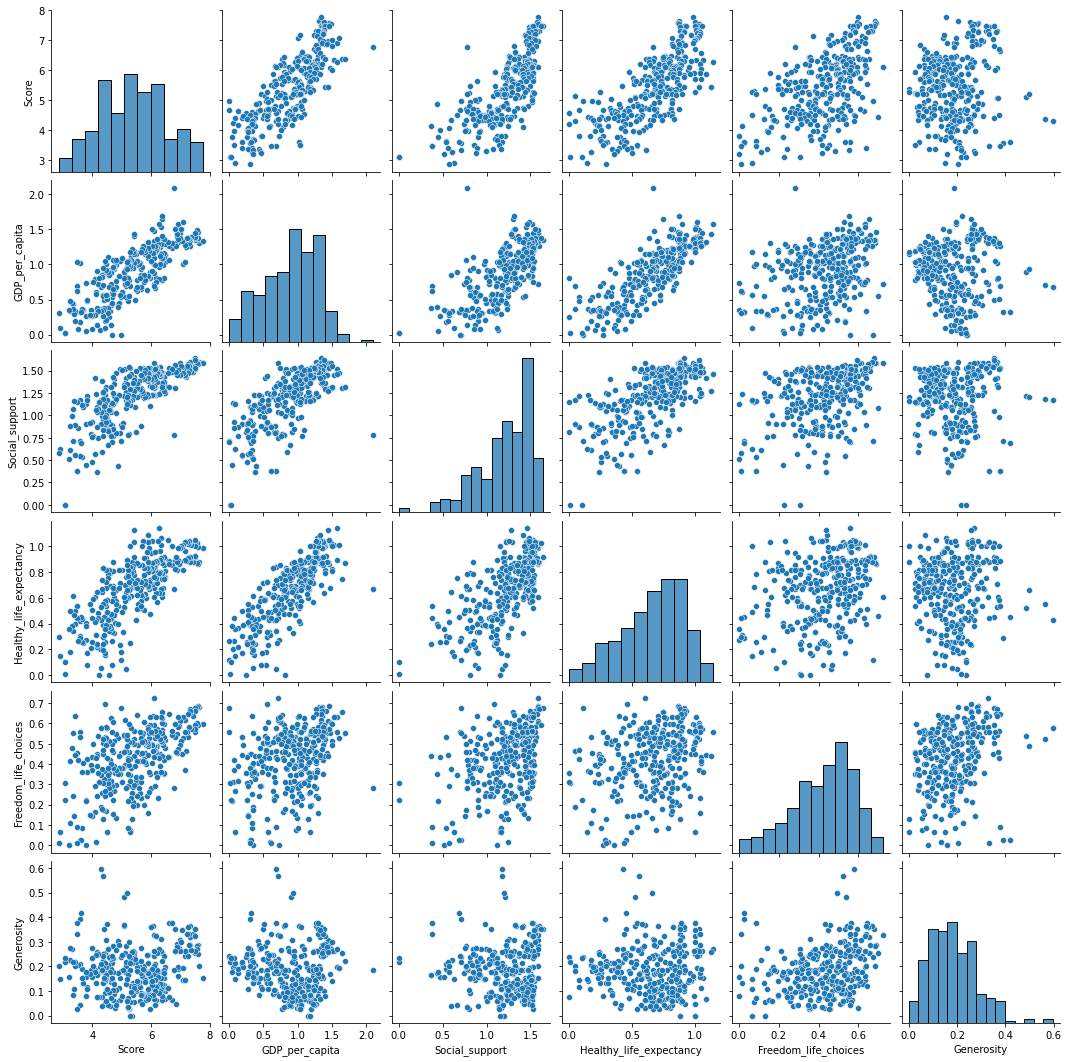

In [ ]:
# Task 4
# (NOT autograded but fill in your code!)

# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Use sns.pairplot(data) where data is the name of your DataFrame
# sns.pairplot()

# YOUR CODE HERE
sns.pairplot(happy)
plt.show()

**Task 5** - Identify the dependent and independent variables

Before we fit a linear regression to the variables in this data set, we need to determine the dependent variable (the target or y variable) and independent variable (the feature or x variable). For this dataset, we have one dependent variable and a few choices for the independent variable(s). Using the information about the data set and what you know from previous tasks, complete the following:

* Assign the dependent variable to `y_var`
* Choose **one** independent variable and assign it to `x_var`

In [ ]:
# Task 5

# YOUR CODE HERE
y_var = happy['Score']
x_var = 'GDP_per_capita'

**Task 5 Test**

In [ ]:
# Task 5 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 6** - Fit a line using seaborn

Before we fit the linear regression model, we'll check how well a line fits. Because you have some choices for which independent variable to select, we're going to complete the rest of our analysis using `GDP per capita` as the independent variable. We're using `Score` as the dependent (target) variable.

The seaborn `lmplot()` documentation can be found [here](https://seaborn.pydata.org/generated/seaborn.lmplot.html). You can also use `regplot()` and the documentation is [here](https://seaborn.pydata.org/generated/seaborn.regplot.html)

This task will not be autograded - but it is part of completing the challenge!

**Your tasks:**

* Create a scatter plot using seaborn with `GDP_per_capita` and `Score`
* Use `sns.lmplot()` or `sns.regplot()` and specify a confidence interval of 0.95
* Answer the questions about your plot (not autograded).


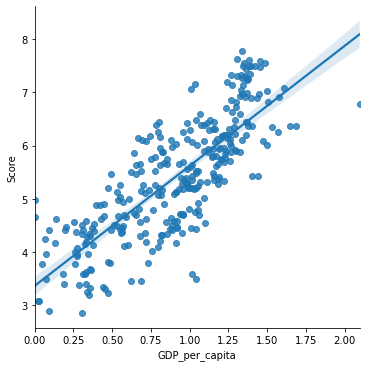

In [ ]:
# Task 6
# YOUR CODE HERE
sns.lmplot(x=x_var, y=y_var, data=happy, ci=95)# by default ci = 95
plt.show()

**Task 6** - Short answer

1. Does it make sense to fit a linear model to these two variables? In otherwords, are there any problems with this data like extreme outliers, non-linearity, etc.
2. Over what range of your independent variable does the linear model not fit the data well? Over what range does a line fit the data well?

---

1. YOUR ANSWER HERE There are some extreme outliers but in general the line fit well 
2. YOUR ANSWER HERE The linear model fit well when GDP per capita is in range (0, 1.5) and does not fit well when GDP per capita above 1.5

**Task 7** - Fit a linear regression model

Now it's time to fit the linear regression model! We have two variables (`GDP_per_capita` and `Score`) that we are going to use in our model.

**Your tasks:**

*  Use the provided import for the `statsmodels.formula.api` library `ols` method
*  Fit a **single variable linear regression model** and assign the model to the variable `model_1`
* Print out the model summary and assign the value of R-squared for this model to `r_square_model_1`. Your value should be defined to three decimal places (example: `r_square_model_1 = 0.123`)
* Answer the questions about your resulting model parameters (these short answer questions will not be autograded).

**NOTE:** - For this task to be correctly autograded, you need to input the model parameters as specified in the code cell below. Part of this Sprint Challenge is correctly implementing the instructions in each task.

In [ ]:
# Task 7

# Import the OLS model from statsmodels
from statsmodels.formula.api import ols

# YOUR CODE HERE
model_1 = ols('Score ~ GDP_per_capita', data=happy).fit()
r_square_model_1 = round(model_1.rsquared,3)
# Print the model summary
print(r_square_model_1)
print(model_1.summary())

0.637
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     543.4
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           3.82e-70
Time:                        11:01:04   Log-Likelihood:                -318.08
No. Observations:                 312   AIC:                             640.2
Df Residuals:                     310   BIC:                             647.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3667      0.095  

**Task 7 Test**

In [ ]:
# Task 7 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 8** - Interpret your model

Using the model summary you printed out above, answer the following questions.

* Assign the slope of `GDP_per_capita` to the variable `slope_model_1`; define it to two decimal places (example: 1.23). This variable should be a float.
* Assign the p-value for this model parameter to `pval_model_1`; this variable could be either an integer or a float.
* Assign the 95% confidence interval to the variables `ci_low` (lower value) and `ci_upper` (upper value); define them to two decimal places.

Answer the following questions (not autograded):

1. Is the correlation between your variables positive or negative?
2. How would you write the confidence interval for your slope coefficient?
3. State the null hypothesis to test for a statistically significant relationship between your two variables.
4. Using the p-value from your model, do you **reject** or **fail to reject** the null hypothesis?

---

1. YOUR ANSWER positive
2. YOUR ANSWER We are 95% confident that the slope of the relationship between GDP per capita and happiness score in the world is between 2.06 and 2.44 happiness score per 1 unit of GDP.
3. YOUR ANSWER Null hypothesis is there is no statistically significant relationship between GDP per capita and happiness score
4. YOUR ANSWER A the 0.05 level we reject the null hypothesis

In [ ]:
# Task 8

# YOUR CODE HERE
slope_model_1 = round(model_1.params[1],2)
pval_model_1 = model_1.pvalues[1]
ci_low = round(model_1.conf_int(alpha=.05)[0][1],2)
ci_upper = round(model_1.conf_int(alpha=.05)[1][1],2)
print('slope',slope_model_1)
print('pval', pval_model_1)
print(ci_low)
print(ci_upper)

slope 2.25
pval 3.816445419537393e-70
2.06
2.44


**Task 8 Test**

In [ ]:
# Task 8 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 9** - Fit a multiple predictor linear regression model

For this next task, we'll add in an additional independent or predictor variable. Let's look back at the pairplot and choose another variable - we'll use `Social_support`. Recall from the Guided Projects and Module Projects that we are looking to see if adding the variable `Social_support` is statistically significant after accounting for the `GDP_per_capita` variable.

We're going to fit a linear regression model using two predictor variables: `GDP_per_capita` and `Social_support`.

**Your tasks:**

* Fit a model with both predictor variables and assign the model to `model_2`. The format of the input to the model is `Y ~ X1 + X2`. 
    * **X1 = `GDP_per_capita`** and  **X2 = `Social_support`**.
* Print out the model summary and assign the value of R-squared for this model to `r_square_model_2`. Your value should be defined to three decimal places.
* Assign the value of the adjusted R-square to `adj_r_square_model_2`. Your value should be defined to three decimal places.

In [ ]:
# Task 9

# YOUR CODE HERE
model_2 = ols('Score ~ GDP_per_capita + Social_support', data=happy).fit()
r_square_model_2 = round(model_2.rsquared,3)
adj_r_square_model_2 = round(model_2.rsquared_adj,3)
# Print the model summary
print(r_square_model_2)
print(adj_r_square_model_2)
print(model_2.summary())

0.712
0.71
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     381.5
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           3.46e-84
Time:                        11:01:04   Log-Likelihood:                -282.03
No. Observations:                 312   AIC:                             570.1
Df Residuals:                     309   BIC:                             581.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.3178      0.

**Task 9 Test**

In [ ]:
# Task 9 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 10** - Multiple regression model interpretation

Now that we have added an additional variable to our regression model, let's look at how the explained variance (the R-squared value) changes.

**Your tasks**
* Find the explained variance from `model_1` and assign it to the variable `r_square_percent1`; your variable should be expressed as a **percentage** and should be rounded to the nearest integer.
* Find the explained variance (*adjusted!*) from `model_2` and assign it to the variable `r_square_adj_percent2`; you variable should be expressed as a **percentage** and should be rounded to the nearest integer.

---
Question (not autograded):

How does the adjusted R-squared value change when a second predictor variable is added?

YOUR ANSWER The adjusted R-squared value increase.

In [ ]:
# Task 10

# YOUR CODE HERE
r_square_percent1 = round(r_square_model_1*100)
r_square_adj_percent2 = round(adj_r_square_model_2*100)
print(r_square_percent1)
print(r_square_adj_percent2)

64
71


**Task 10 Test**

In [ ]:
# Task 10 - Test
assert r_square_percent1 >= 1, 'Make sure you use the percentage and not the decimal fraction.'
assert r_square_adj_percent2 >= 1, 'Make sure you use the percentage and not the decimal fraction.'

# Hidden tests - you will see the results when you submit to Canvas

**Task 11** - Making a prediction and calculating the residual

We're going to use our model to make a prediction. Refer to the `happy` DataFrame and find the `GDP_per_capita` score for "Iceland" (index 4).  Then when we have a prediction, we can calculate the residual.  **There are actually two row entries for Iceland, both with slightly different column values. Use the column values that you can see when you print `happy.head()`.**

**Prediction**
* Assign the `GDP_per_capita` value to the variable `x_iceland`; it should be float and defined out to two decimal places.
* Using your slope and intercept values from `model_1`, calculate the `Score` for Iceland (`x_iceland`); assign this value to `predict_iceland` and it should be a float.

**Residual**
* Assign the observed `Score` for Iceland and assign it to the variable `observe_iceland`; it should be float and defined out to two decimal places *(careful with the rounding!)*.
* Determine the residual for the prediction you made and assign it to the variable `residual_iceland` (use your Guided Project or Module Project notebooks if you need a reminder of how to do a residual calculation).

Hint: Define your slope and intercept values out to two decimal places! Your resulting prediction for Iceland should have at least two decimal places. **Make sure to use the parameters from the first model (`model_1`)**.

In [ ]:
# Task 11

# YOUR CODE HERE
x_iceland = round(happy.loc[4,'GDP_per_capita'].iloc[0],2)
predict_iceland = round(model_1.params[0],2) + round(model_1.params[1],2)*x_iceland
observe_iceland = round(happy.loc[4,'Score'].iloc[0],2)
residual_iceland = round(observe_iceland - predict_iceland,3)
# View your prediction
print('Prediction for Iceland :', predict_iceland)
print('Residual for Iceland prediction :', residual_iceland)

Prediction for Iceland : 6.385
Residual for Iceland prediction : 1.115


**Task 11 Test**

In [ ]:
# Task 11 - Test

assert residual_iceland >= 0, 'Check your residual calculation (use observed - predicted).'
assert round(x_iceland, 1) == 1.3, 'Check your Iceland GDP value.'
assert round(observe_iceland, 1) == 7.5, 'Check your Iceland observation value for "Score".'

# Hidden tests - you will see the results when you submit to Canvas

## Part B: Vectors and cosine similarity

In this part of the challenge, we're going to look at how similar two vectors are. Remember, we can calculate the **cosine similarity** between two vectors by using this equation:

$$\cos \theta= \frac{\mathbf {A} \cdot \mathbf {B} }{\left\|\mathbf {A} \right\|\left\|\mathbf {B} \right\|}$$

$\qquad$

where

* The numerator is the dot product of the vectors $\mathbf {A}$ and $\mathbf {B}$
* The denominator is the norm of $\mathbf {A}$ times the norm of $\mathbf {B}$

### Three documents, two authors

For this task, you will calculate the cosine similarity between three vectors. But here's the interesting part: each vector represents a "chunk" of text from a novel (a few chapters of text). This text was cleaned to remove non-alphanumeric characters and numbers and then each document was transformed into a vector representation as described below.

### Document vectors

In the dataset you are going to load below, each row represents a word that occurs in at least one of the documents. So all the rows are all the words that are in our three documents.

Each column represents a document (doc0, doc1, doc2). Now the fun part: the value in each cell is how frequently that word (row) occurs in that document (term-frequency) divided by how many documents that words appears in (document-frequency).

`cell value = term_frequency / document_frequency`

Use the above information to complete the remaining tasks.

**Task 12** - Explore the text documents

You will be using cosine similarity to compare each document vector to the others. Remember that there are three documents, but two authors. Your task is to use the cosine similarity calculations to determine which two document vectors are most similar (written by the same author).

**Your tasks:**

* Load in the CSV file that contains the document vectors (this is coded for you - just run the cell)
* Look at the DataFrame you just loaded in any way that helps you understand the format, what's included in the data, the shape of the DataFrame, etc.

**You can use document vectors just as they are - you don't need to code anything for Task 12.**

In [ ]:
# Imports (import pandas if you haven't yet)

# Load the data - DON'T DELETE THIS CELL
url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_4/unit1_nlp/text_vectors.csv'
text = pd.read_csv(url)
text.head()

,Unnamed: 0,word,doc0,doc1,doc2
0,0,abhorrent,0.0,0.000000,0.008915
1,1,ability,0.0,0.021156,0.000000
2,2,abject,0.0,0.000000,0.008915
3,3,able,0.0,0.000000,0.017829
4,4,abode,0.0,0.042313,0.000000


In [ ]:
# Task 12

## Explore the data
text.shape
text.info()
# (this part is not autograded)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389 entries, 0 to 3388
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3389 non-null   int64  
 1   word        3389 non-null   object 
 2   doc0        3389 non-null   float64
 3   doc1        3389 non-null   float64
 4   doc2        3389 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 132.5+ KB


**Task 13** - Calculate cosine similarity

* Calculate the cosine similarity for **three pairs of vectors** and assign the results to the following variables (each variable will be a float):

  * assign the cosine similarity of doc0-doc1 to `cosine_doc0_1`
  * assign the cosine similarity of doc0-doc2 to `cosine_doc0_2`
  * assign the cosine similarity of doc1-doc2 to `cosine_doc1_2`

* Print out the results so you can refer to them for the short answer section.
* Answer the questions after you have completed the cosine similarity calculations.

In [ ]:
# Task 13

# Use these imports for your cosine calculations (DON'T DELETE)
from numpy import dot
from numpy.linalg import norm

# YOUR CODE HERE
cosine_doc0_1 = dot(text['doc0'],text['doc1'])/(norm(text['doc0'])*norm(text['doc1']))
cosine_doc0_2 = dot(text['doc0'],text['doc2'])/(norm(text['doc0'])*norm(text['doc2']))
cosine_doc1_2 = dot(text['doc1'],text['doc2'])/(norm(text['doc1'])*norm(text['doc2']))
# Print out the results
print('Cosine similarity for doc0-doc1:', cosine_doc0_1)
print('Cosine similarity for doc0-doc2:', cosine_doc0_2)
print('Cosine similarity for doc1-doc2:', cosine_doc1_2)


Cosine similarity for doc0-doc1: 0.12963801321608845
Cosine similarity for doc0-doc2: 0.09904444112880127
Cosine similarity for doc1-doc2: 0.32171252792371646


**Task 13** - Short answer

1. Using your cosine similarity calculations, which two documents are most similar?
2. If doc1 and doc2 were written by the same author, are your cosine similarity calculations consistent with this statement?
3. What process would we need to follow to add an additional document column? In other words, why can't we just stick another column with (term-frequency/document-frequency) values onto our current DataFrame `text`?

---

1. YOUR ANSWER Document 1 and 2 are the most similar
2. YOUR ANSWER Yes
3. YOUR ANSWER Because we need to re-calculate the document-frequency of each word in previous documents plus the additional one.

**Task 13 Test**

In [ ]:
# Task 13 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Additional Information about the texts used in this analysis:**

You can find the raw text [here](https://github.com/LambdaSchool/data-science-practice-datasets/tree/main/unit_4/unit1_nlp). Dcoument 0 (doc0) is chapters 1-3 from "Pride and Predjudice" by Jane Austen. Document 1 (doc1) is chapters 1- 4 from "Frankenstein" by Mary Shelley. Document 2 is also from "Frankenstein", chapters 11-14.